In [1]:
import sys
import os
from glob import glob
sys.path.append("../")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
#Input the training directory containing training image patches and labels 
TrainDataDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/StaticCenterTrainData/'
#Directory containing the train category json, model parameter and weight vector file
ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORStaticONEAT.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

In [3]:
#Neural network parameters
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 56
#Training epochs, longer the better with proper chosen learning rate
epochs = 150
#Size of the gradient descent length vector, start small and use callbacs to get smaller when reaching the minima
learning_rate = 1.0E-4
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 20
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Grid and number of boxes for yolo
gridX = 1
gridY = 1
ImageX = 64
ImageY = 64
anchors = [0.29,0.32, 0.73,0.72]


In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = gridX, gridY = gridY, ImageX = ImageX, ImageY = ImageY, nboxes = int(len(anchors))/2, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=64, ImageY=64, ModelName='ORStaticONEAT.h5', batch_size=20, box_vector=5, categories=4, depth=38, epochs=150, gridX=1, gridY=1, learning_rate=0.0001, mid_kernel=3, multievent=False, nboxes=1.0, residual=True, start_kernel=3, startfilter=32)


In [5]:
Train = NEATStaticDetection(config, anchors, TrainDataDir, KeyCategories, KeyCord, ModelDir, Model_Name, show = show)

Train.loadData()



(1698, 1, 1, 1, 9) (1698, 64, 64, 1)
number of  images:	 1698
image size:		 (1698, 64, 64, 1)
Labels:				 (1698, 1, 1, 1, 9)
















Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_image[0][0]                
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
______________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1613 samples, validate on 85 samples
Epoch 1/150
1613/1613 [==============================] - 16s 10ms/step - loss: 569.8580 - acc: 0.2529 - val_loss: 2405.7330 - val_acc: 0.0000e+00

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


<Figure size 432x288 with 0 Axes>

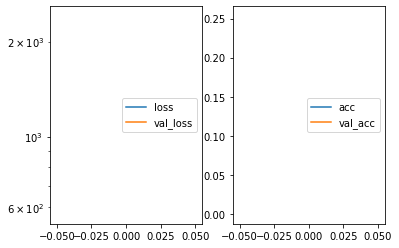

Prediction : [[[[1. 0. 1. 1. 1. 0. 1. 0. 0.]]]]
True Label :  [[0.28980629 0.37705221 0.984375   1.34375    1.         0.
  1.         0.         0.        ]]


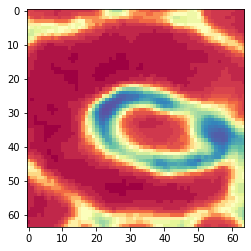

Epoch 2/150
1613/1613 [==============================] - 5s 3ms/step - loss: 284.2154 - acc: 0.0980 - val_loss: 2187.4359 - val_acc: 0.0000e+00

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


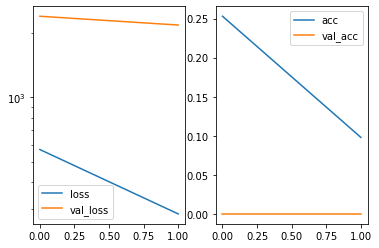

Prediction : [[[[0. 0. 1. 1. 1. 0. 1. 0. 0.]]]]
True Label :  [[0.46542358 0.53616333 0.5        0.34375    1.         0.
  1.         0.         0.        ]]


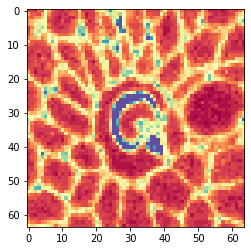

Epoch 3/150
1613/1613 [==============================] - 5s 3ms/step - loss: 266.9411 - acc: 0.0558 - val_loss: 2402.5651 - val_acc: 0.0000e+00

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


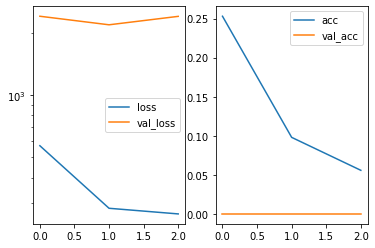

Prediction : [[[[1. 0. 1. 1. 1. 0. 1. 0. 0.]]]]
True Label :  [[0.58683087 0.58739496 1.453125   1.34375    1.         0.
  1.         0.         0.        ]]


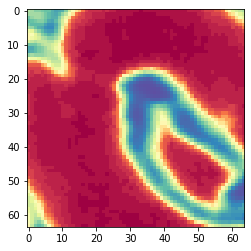

Epoch 4/150
1613/1613 [==============================] - 5s 3ms/step - loss: 299.5908 - acc: 0.0037 - val_loss: 2426.8018 - val_acc: 0.0000e+00

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/NEATModel/ORStaticONEAT.h5


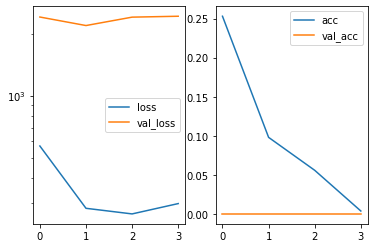

Prediction : [[[[1. 0. 1. 1. 1. 0. 1. 0. 0.]]]]
True Label :  [[0.58535117 0.46399594 0.453125   0.34375    1.         1.
  0.         0.         0.        ]]


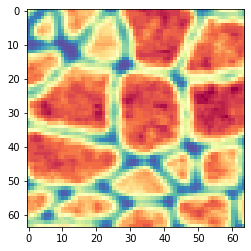

Epoch 5/150
1180/1613 [====================>.........] - ETA: 1s - loss: 277.4708 - acc: 8.4746e-04

KeyboardInterrupt: 

In [6]:
Train.TrainModel()